This notebook calculates how the network stability changes with increasing difficulties in long distance trade. To do so it calculates the network stability for an increasing beta. The range of values for beta is based on the past range of the trade network. 

In [1]:
from src.model import PyTradeShifts
from src.postprocessing import Postprocessing
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statistics
import os
os.chdir('../../')
print(os.getcwd())

/home/florian/Documents/GitHub/pytradeshifts


First read in the past gravity values and calculate the range for all crops based on this. The past gravity values have been calculated in [this notebook](https://github.com/allfed/pytradeshifts/blob/main/scripts/Gravity%20Calculations/finding_gravity_model_exponent_all_crops_and_years.ipynb).

In [2]:
alpha_range = pd.read_csv("results" + os.sep + "gravity_exponent.csv", index_col=0)
alpha_range.head()

,Maize,Wheat,Rice,Soya beans
1993,1.227071,1.140542,1.379424,1.000938
1994,1.276134,1.201054,1.590688,1.001231
1995,1.107835,1.228789,1.643573,1.001141
1996,1.160123,1.150435,1.616110,1.000745
1997,1.207135,1.130620,1.513640,1.001443


In [3]:
range_alpha = {}
for crop in alpha_range.columns:
    range_alpha[crop] = alpha_range[crop].max() - alpha_range[crop].min()
    print(crop, range_alpha[crop])

Maize 0.2358748816413998
Wheat 0.12877590022622143
Rice 0.5940737927192268
Soya beans 0.061821828717218974


Now we calculate the node stability from beta = 0 to beta = 2 * historical range. This is to show the potential changes after catastrophe.

In [4]:
# Create an empty dataframe
network_df = pd.DataFrame(columns=['Crop', 'Beta', 'Participation', 'Z-Score', 'Node Stability', 'Community Satisfaction'])

for crop in alpha_range.columns:
    for beta in np.arange(0, 2.01, 0.25):
        print(crop, beta)
        model = PyTradeShifts(
            crop=crop,
            base_year=2022,
            cd_kwargs={"seed": 2},
            make_plot=False,
            beta=beta,
        )
        post = Postprocessing([model])
        # Calculate the median for participation
        median_participation = statistics.median(post.participation[0].values())

        # Calculate the median for zscores
        median_zscore = statistics.median(post.zscores[0].values())

        # Calculate the median for node stabilty
        median_node_stability = statistics.median(post.node_stability[0].values())

        # Calculate the median for community satisfaction
        median_community_satisfaction = statistics.median(post.community_satisfaction[0].values())
        
        # Concat the data to the dataframe
        temp_df = pd.DataFrame({
            'Crop': crop,
            'Beta': beta,
            "Participation": median_participation,
            "Z-Score": median_zscore,
            "Node Stability": median_node_stability,
            "Community Satisfaction": median_community_satisfaction
        }, index=[0])
        network_df = pd.concat([network_df, temp_df], ignore_index=True)

# Print the dataframe
print(network_df)
        

Maize 0.0
The duplicates are the following: 
Index(['Micronesia, Fed. Sts.', 'Micronesia, Fed. Sts.'], dtype='object')
The duplicates are the following: 
Index(['Micronesia, Fed. Sts.', 'Micronesia, Fed. Sts.'], dtype='object')
Loaded data for Maize in Y2022.
Removed 0 countries with no trade or production.
Prebalanced trade matrix.
Determinant=0 encountered in PyTradeShifts.correct_reexports().
Re-applying PyTradeShifts.remove_net_zero_countries().
Removed 1 countries with no trade or production.
Attempting to invert the matrix again.
Corrected re-exports.
Removed countries with trade below the 75th percentile.
Built trade graph.
Found 7 trade communities.
Starting postprocessing computations...


/tmp/ipykernel_71483/624263510.py:36: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  network_df = pd.concat([network_df, temp_df], ignore_index=True)


Maize 0.25
The duplicates are the following: 
Index(['Micronesia, Fed. Sts.', 'Micronesia, Fed. Sts.'], dtype='object')
The duplicates are the following: 
Index(['Micronesia, Fed. Sts.', 'Micronesia, Fed. Sts.'], dtype='object')
Loaded data for Maize in Y2022.
Removed 0 countries with no trade or production.
Prebalanced trade matrix.
Determinant=0 encountered in PyTradeShifts.correct_reexports().
Re-applying PyTradeShifts.remove_net_zero_countries().
Removed 1 countries with no trade or production.
Attempting to invert the matrix again.
Corrected re-exports.
Removed countries with trade below the 75th percentile.
Applied distance cost with beta=0.25.
Built trade graph.
Found 7 trade communities.
Starting postprocessing computations...
Maize 0.5
The duplicates are the following: 
Index(['Micronesia, Fed. Sts.', 'Micronesia, Fed. Sts.'], dtype='object')
The duplicates are the following: 
Index(['Micronesia, Fed. Sts.', 'Micronesia, Fed. Sts.'], dtype='object')
Loaded data for Maize in Y2

In [5]:
# Save the dataframe to a csv file
network_df.to_csv("results" + os.sep + "network_analysis.csv")

In [6]:
# Read it again in order to plot it
network_df = pd.read_csv("results" + os.sep + "network_analysis.csv", index_col=0)

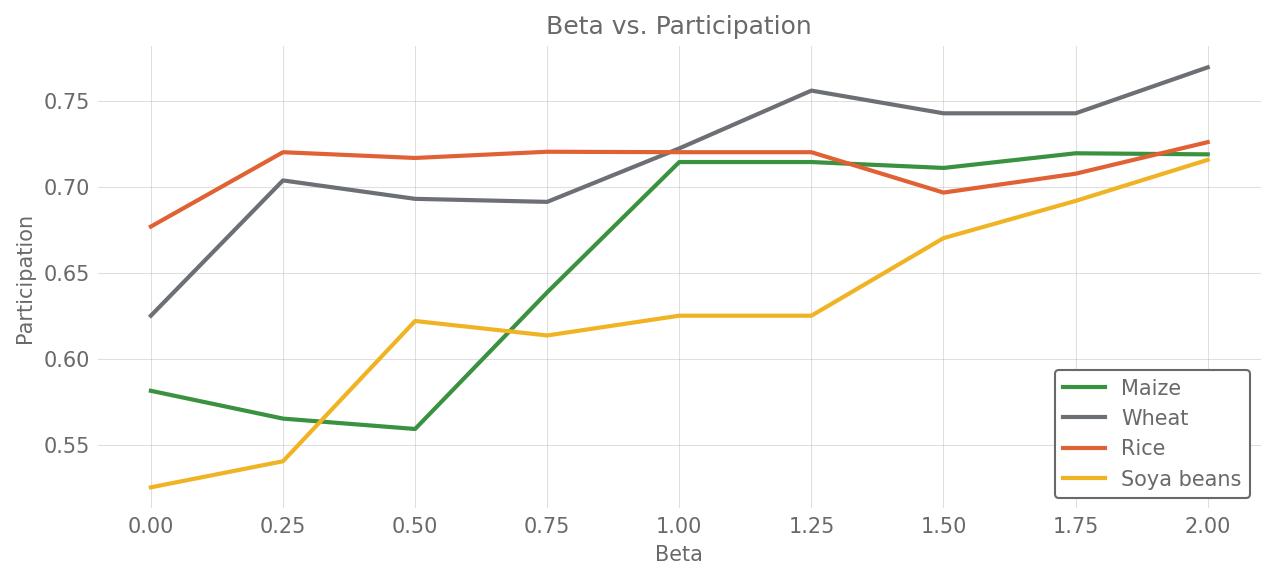

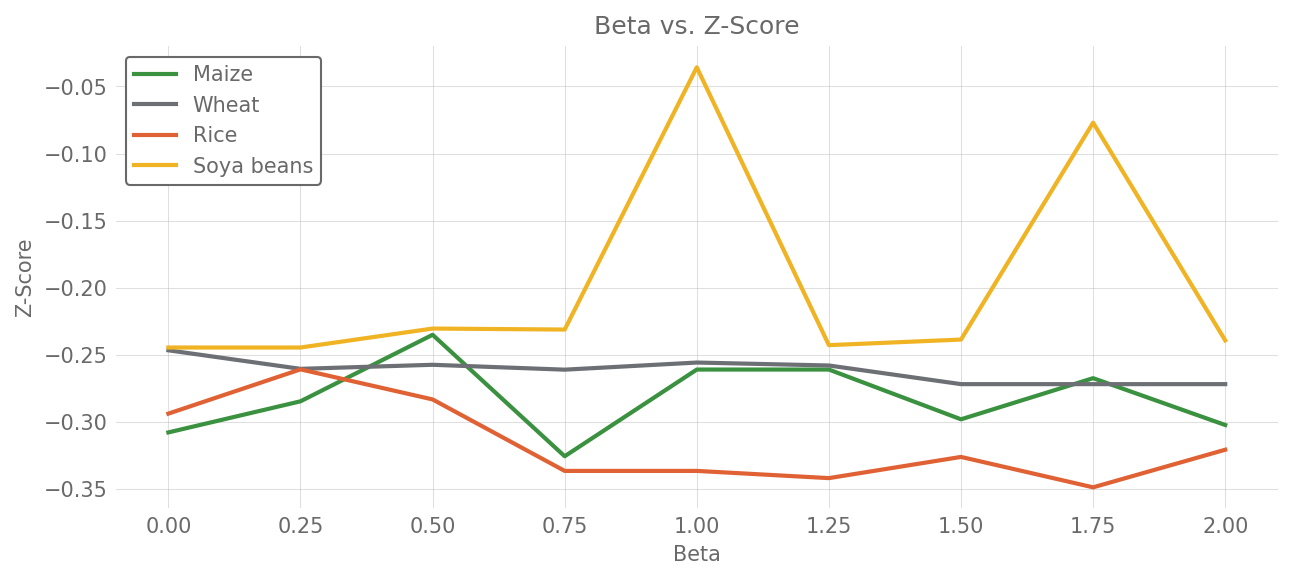

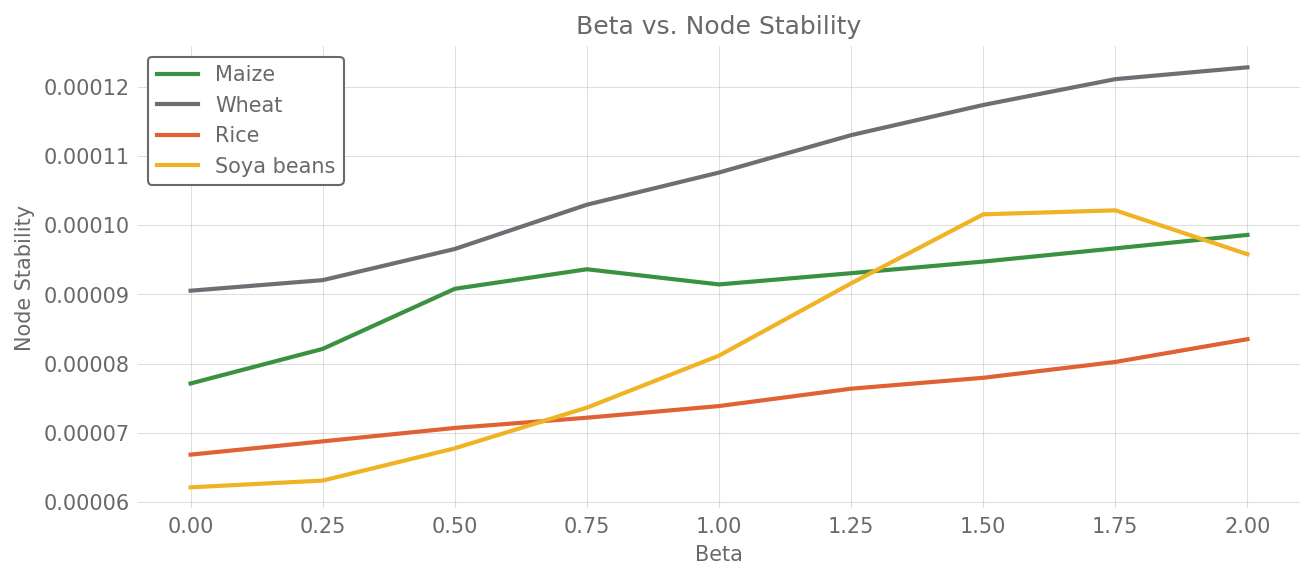

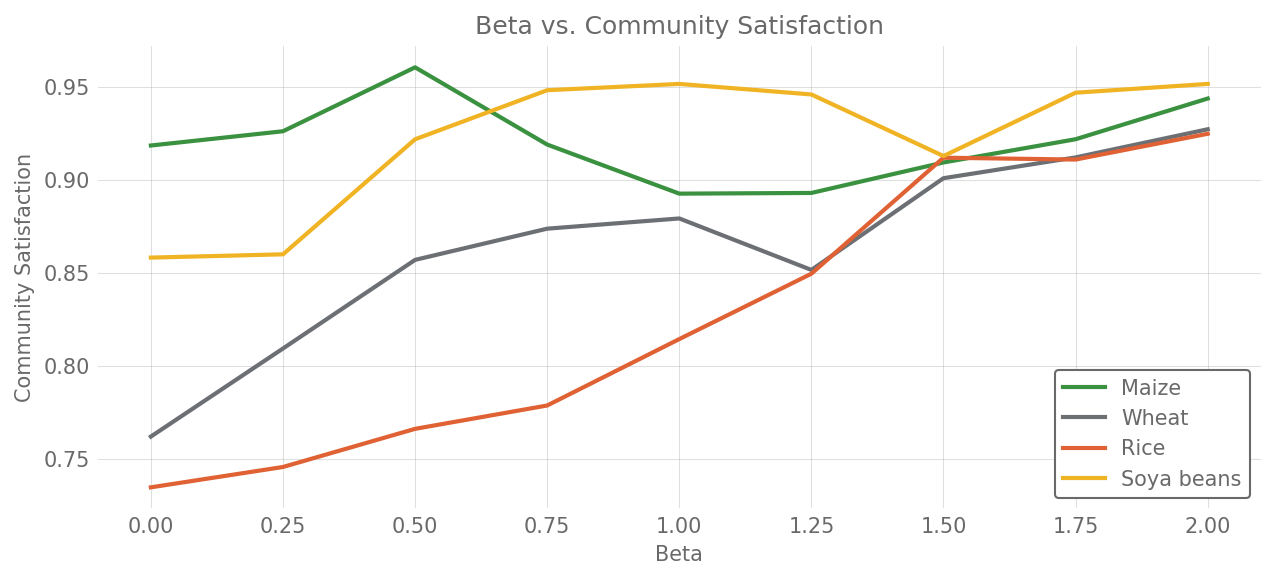

In [7]:
# Plot beta vs. participation and beta vs. z-score separately by metric
metrics = ['Participation', 'Z-Score', 'Node Stability', 'Community Satisfaction']
for metric in metrics:
    plt.figure()
    for crop in network_df.Crop.unique():
        crop_df = network_df[network_df.Crop == crop]
        plt.plot(crop_df['Beta'], crop_df[metric], label=crop)
    plt.title(f'Beta vs. {metric}')
    plt.xlabel('Beta')
    plt.ylabel(metric)
    plt.legend()
    plt.show()
